In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [2]:

train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.shape

(891, 12)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


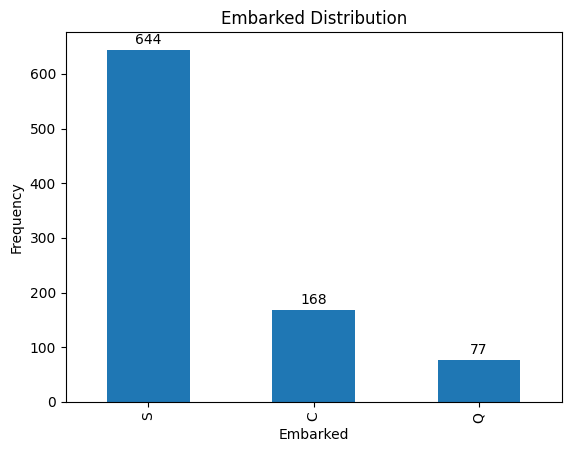

In [5]:
ax = train_data['Embarked'].value_counts().plot(kind='bar', alpha=1)
rects = ax.patches
# Fix the list comprehension
labels = ["%d" % i for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, height, ha='center', va='bottom')

plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.show()


In [6]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')

Text(0, 0.5, 'Normalized Count')

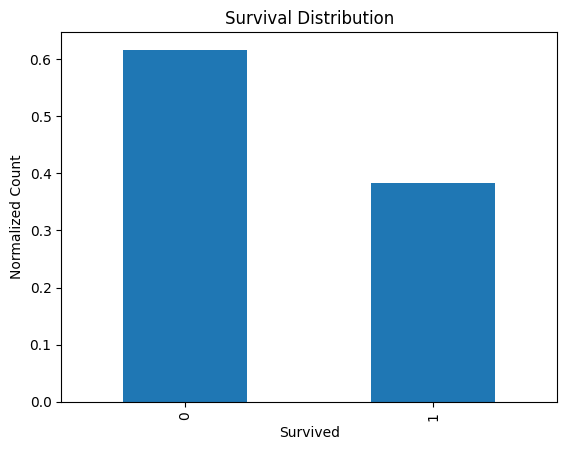

In [7]:
train_data['Survived'].value_counts(normalize=True).plot(kind='bar')
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Normalized Count')


Text(0, 0.5, 'Normalized Count')

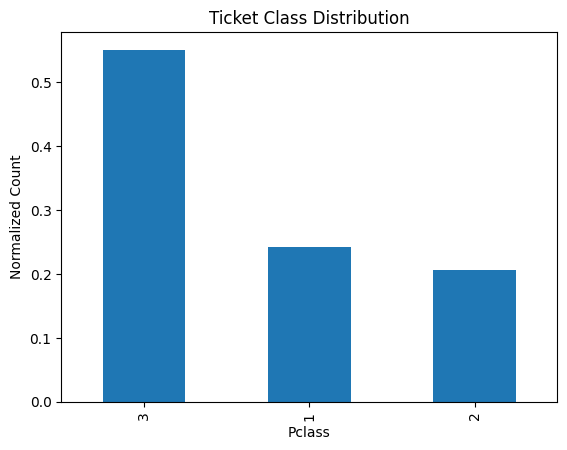

In [8]:
train_data['Pclass'].value_counts(normalize=True).plot(kind='bar')
plt.title('Ticket Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Normalized Count')


Text(0, 0.5, 'Normalized Count')

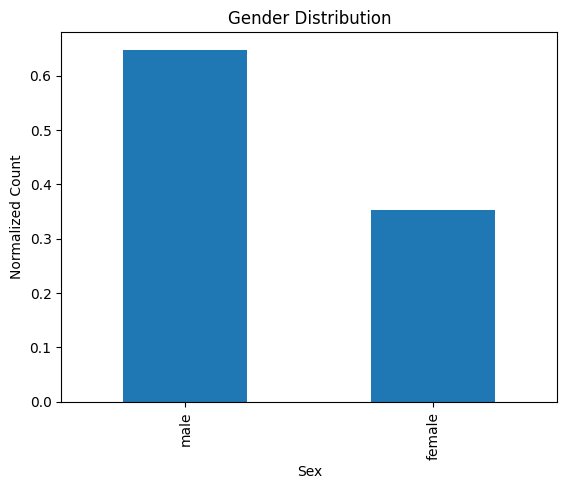

In [9]:
train_data['Sex'].value_counts(normalize=True).plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Normalized Count')


Text(0, 0.5, 'Normalized Count')

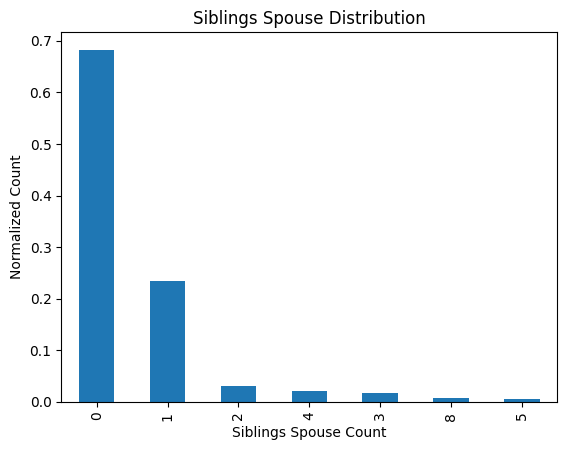

In [10]:
train_data['SibSp'].value_counts(normalize=True).plot(kind='bar')
plt.title('Siblings Spouse Distribution')
plt.xlabel('Siblings Spouse Count')
plt.ylabel('Normalized Count')


Text(0, 0.5, 'Normalized Count')

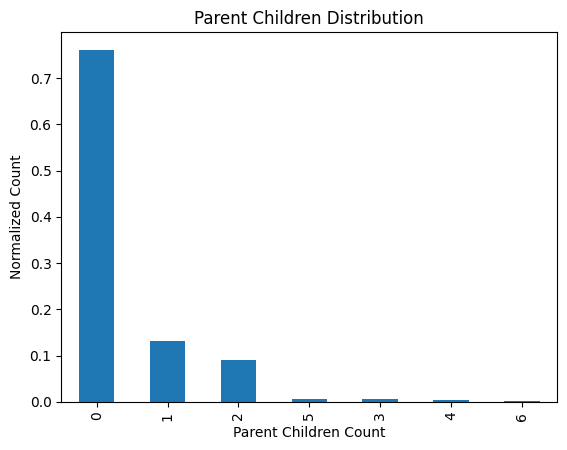

In [11]:
train_data['Parch'].value_counts(normalize=True).plot(kind='bar')
plt.title('Parent Children Distribution')
plt.xlabel('Parent Children Count')
plt.ylabel('Normalized Count')


Text(0, 0.5, 'Frequency')

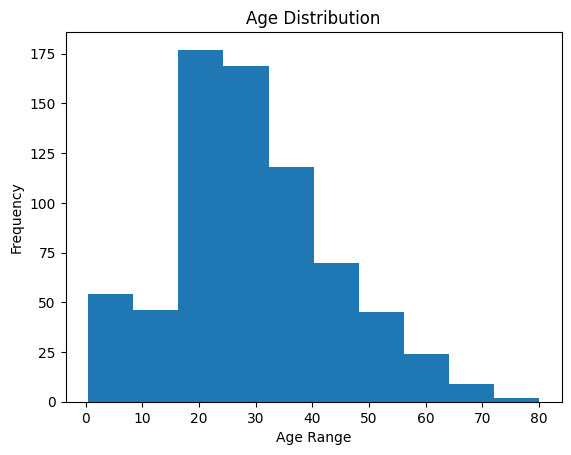

In [12]:
train_data['Age'].plot(kind='hist')
plt.title('Age Distribution')
plt.xlabel('Age Range')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

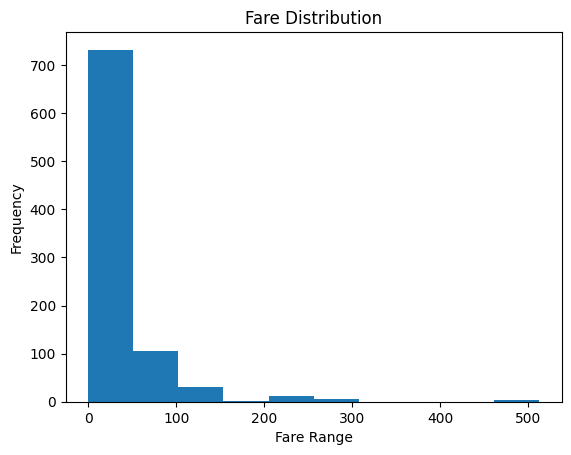

In [13]:
train_data['Fare'].plot(kind='hist')
plt.title('Fare Distribution')
plt.xlabel('Fare Range')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Age vs Female vs Class3')

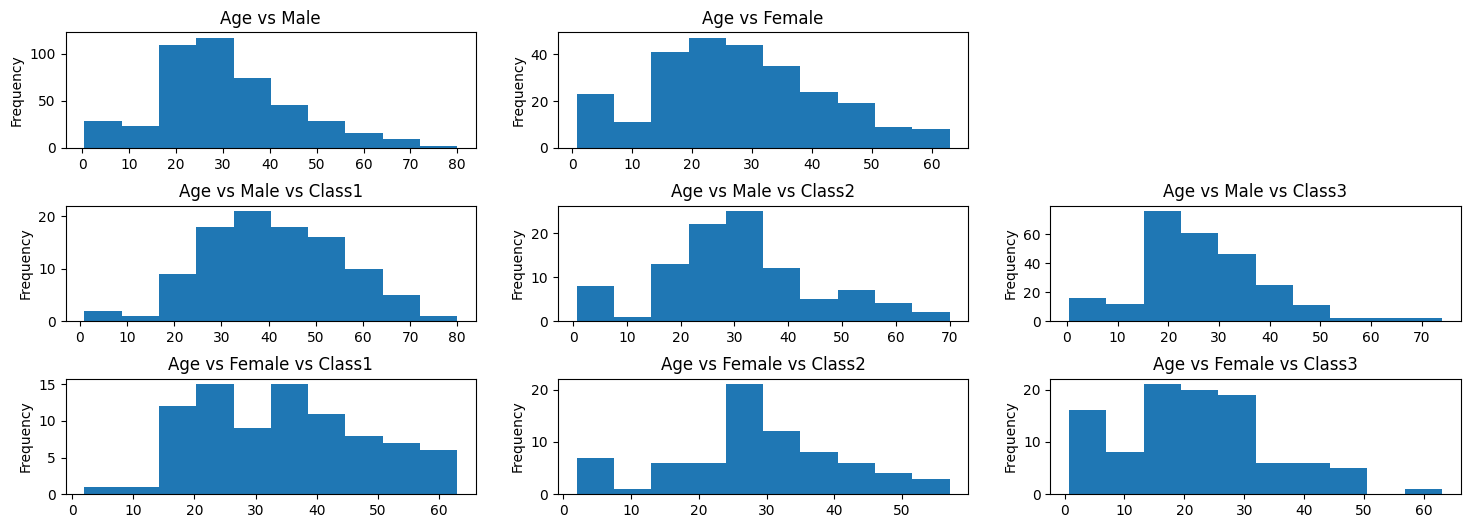

In [14]:
ig = plt.figure(figsize=(18,6))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0))
train_data['Age'][(train_data['Sex']=='male')].plot(kind='hist')
plt.title('Age vs Male')

plt.subplot2grid((3,3), (0,1))
train_data['Age'][(train_data['Sex']=='female')].plot(kind='hist')
plt.title('Age vs Female')

plt.subplot2grid((3,3), (1,0))
train_data['Age'][(train_data['Sex']=='male') & (train_data['Pclass']==1)].plot(kind='hist')
plt.title('Age vs Male vs Class1')

plt.subplot2grid((3,3), (1,1))
train_data['Age'][(train_data['Sex']=='male') & (train_data['Pclass']==2)].plot(kind='hist')
plt.title('Age vs Male vs Class2')
plt.subplot2grid((3,3), (1,2))

train_data['Age'][(train_data['Sex']=='male') & (train_data['Pclass']==3)].plot(kind='hist')
plt.title('Age vs Male vs Class3')
plt.subplot2grid((3,3), (2,0))

train_data['Age'][(train_data['Sex']=='female') & (train_data['Pclass']==1)].plot(kind='hist')
plt.title('Age vs Female vs Class1')
plt.subplot2grid((3,3), (2,1))

train_data['Age'][(train_data['Sex']=='female') & (train_data['Pclass']==2)].plot(kind='hist')
plt.title('Age vs Female vs Class2')
plt.subplot2grid((3,3), (2,2))

train_data['Age'][(train_data['Sex']=='female') & (train_data['Pclass']==3)].plot(kind='hist')
plt.title('Age vs Female vs Class3')

In [15]:
train_data["Age"] = train_data.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

Text(0, 0.5, 'Survived Frequency (Normalized)')

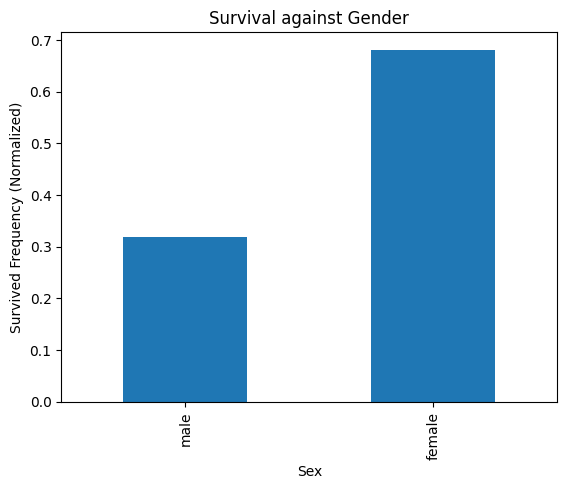

In [16]:

train_data['Sex'][train_data['Survived']==1].value_counts(normalize=True, ascending=True).plot(kind='bar')
plt.title('Survival against Gender')
plt.xlabel('Sex')
plt.ylabel('Survived Frequency (Normalized)')
     

Text(0.5, 1.0, 'Ticket Class vs Survival')

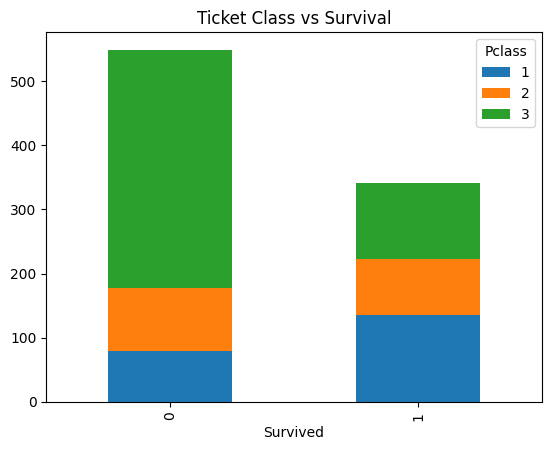

In [17]:

train_data.groupby(['Survived', 'Pclass']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Ticket Class vs Survival')

Text(0, 0.5, 'Count')

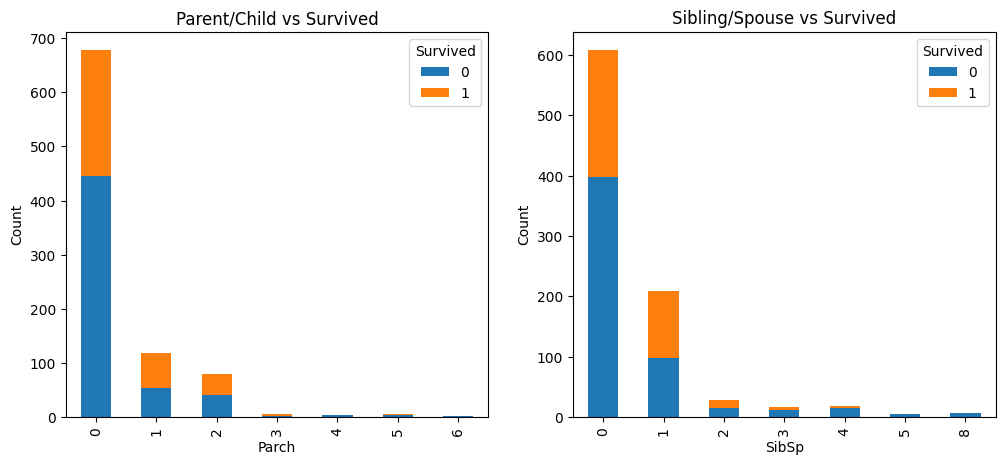

In [18]:

fig = plt.figure(figsize=(12,5))
plt.subplots_adjust(hspace=.5)

ax = plt.subplot2grid((1,2), (0,0))
train_data.groupby(['Parch', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Parent/Child vs Survived')
plt.ylabel('Count')

ax = plt.subplot2grid((1,2), (0,1))
train_data.groupby(['SibSp', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Sibling/Spouse vs Survived')
plt.ylabel('Count')
     

In [19]:
train_data['FamilySize']= train_data['SibSp']+train_data['Parch'] + 1

Text(0.5, 1.0, 'Family vs Survival')

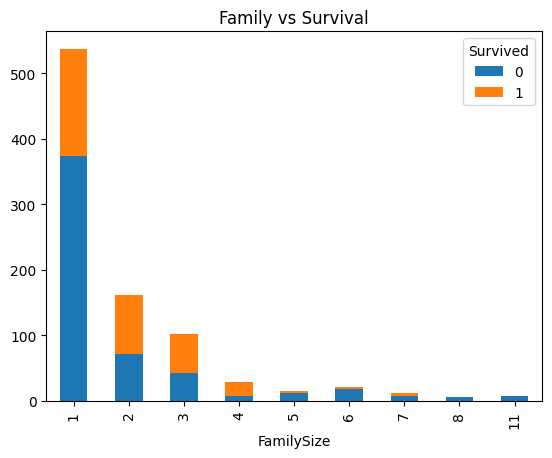

In [20]:

train_data.groupby(['FamilySize', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Family vs Survival')

In [21]:

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [22]:

test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [23]:
# Create the FamilySize feature
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Select relevant features
X_train = train_data[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
X_test = test_data[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]

# Labels to encode
labels_to_encode = ['Pclass', 'Sex', 'Embarked']

# One-hot encoding for training set
for label in labels_to_encode:
    X_train = X_train.join(pd.get_dummies(X_train[label], prefix=label))
    X_train.drop(label, axis=1, inplace=True)

# One-hot encoding for test set
for label in labels_to_encode:
    X_test = X_test.join(pd.get_dummies(X_test[label], prefix=label))
    X_test.drop(label, axis=1, inplace=True)

# Define the target variable
y = train_data['Survived'].values


In [24]:

X_train.head()

,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,2,False,False,True,False,True,False,False,True
1,38.0,71.2833,2,True,False,False,True,False,True,False,False
2,26.0,7.9250,1,False,False,True,True,False,False,False,True
3,35.0,53.1000,2,True,False,False,True,False,False,False,True
4,35.0,8.0500,1,False,False,True,False,True,False,False,True


In [25]:

# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
lr_model = LogisticRegression(solver='liblinear')

     

In [26]:
from sklearn.impute import SimpleImputer

# Create an imputer for filling missing values (use mean, median, or another strategy)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both train and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Perform cross-validation
scores = cross_val_score(lr_model, X_train_imputed, y, cv=5)
print(f"Cross-validation accuracy: {round(np.mean(scores*100))}%")

# Train the logistic regression model on imputed data
lr_model.fit(X_train_imputed, y)

# Make predictions on the test data
predictions_lr = lr_model.predict(X_test_imputed)

# Prepare the submission dataframe
submission_lr = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],  # Assuming test_data contains PassengerId
        "Survived": predictions_lr
})

# Save the predictions to a CSV file
submission_lr.to_csv('titanic_lr.csv', index=False)


Cross-validation accuracy: 80%


In [27]:
# Initialize the RandomForestClassifier
rfclr = RandomForestClassifier(n_estimators=100, max_depth=7)

# Handle missing values by imputing with the mean for numerical features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Perform cross-validation
scores = cross_val_score(rfclr, X_train_imputed, y, cv=5)
print(f"Cross-validation Accuracy: {round(np.mean(scores * 100))}%")

# Fit the model to the imputed training data
rfclr.fit(X_train_imputed, y)

# Make predictions on the imputed test data
predictions_rf = rfclr.predict(X_test_imputed)

# Create the submission dataframe
submission_rf = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": predictions_rf
})

# Save the predictions to a CSV file
submission_rf.to_csv('titanic_rf.csv', index=False)

Cross-validation Accuracy: 82%
